### import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Merge all the 12mths data into one

#### a. method 1 reading all files and concatinating them

In [9]:
# so the method is to read all the csv file and then concat them

frames = [pd.read_csv('data/Sales_Data/Sales_January_2019.csv'),
         pd.read_csv('data/Sales_Data/Sales_February_2019.csv'),
         pd.read_csv('data/Sales_Data/Sales_March_2019.csv'),
         pd.read_csv('data/Sales_Data/Sales_April_2019.csv'),
         pd.read_csv('data/Sales_Data/Sales_May_2019.csv'),
         pd.read_csv('data/Sales_Data/Sales_June_2019.csv'),
         pd.read_csv('data/Sales_Data/Sales_July_2019.csv'),
         pd.read_csv('data/Sales_Data/Sales_August_2019.csv'),
         pd.read_csv('data/Sales_Data/Sales_September_2019.csv'),
         pd.read_csv('data/Sales_Data/Sales_October_2019.csv'),
         pd.read_csv('data/Sales_Data/Sales_November_2019.csv'),
         pd.read_csv('data/Sales_Data/Sales_December_2019.csv'),]
df = pd.concat(frames, ignore_index = True)
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"


#### b. using os to read all files and then concate them

In [60]:
import os
files = [file for file in os.listdir('data/Sales_Data')]
for file in files:
    print(file)

Sales_June_2019.csv
Sales_February_2019.csv
Sales_December_2019.csv
Sales_March_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_May_2019.csv


In [61]:
# now the approach would be to store it all in a dataframe

# read the files from the location
files = [file for file in os.listdir('data/Sales_Data')]

# creating an empty dataframe
amd = pd.DataFrame()

# storing the values in the dataframe
for file in files:
    df_12 = pd.read_csv("data/Sales_Data/"+file)
    amd = pd.concat([amd, df_12])
amd.head(2)    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"


In [62]:
amd.to_csv('amd.csv', index=False)

In [63]:
df_12 = pd.read_csv('amd.csv')
df_12.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"


#### 1.a.i. Clean the data

In [64]:
# check for nan values and replace them with mean
#df_12.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [57]:
#df_12 = df_12.fillna(df_12.mean)

In [58]:
#f_12.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

#### 1.a.ii. Dropping the NAN

In [66]:
nan_df = df_12[df_12.isna().any(axis=1)]
nan_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
339,NaN,NaN,NaN,NaN,NaN,NaN
630,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df_12 = df_12.dropna(how='all') #any for a single NaN in dataframe

In [68]:
nan_df = df_12[df_12.isna().any(axis=1)]
nan_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### 1.b. Find and delete 'Or'

In [52]:
# note: this code is taken from 2. section
df_12['Month'] = df_12['Month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

In [71]:
# find where the 'Or' is

temp_df = df_12[df_12['Month'].str[0:2] == 'Or']
temp_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
158,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
990,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [72]:
# now to drop the data with 'Or' in it

df_12 = df_12[df_12['Month'].str[0:2] != 'Or']

#### 1.c. Convert the rows to float or int to get sales

In [77]:
# note: this is taken from section 2
df_12['Total'] = df_12['Quantity Ordered'] * df_12['Price Each']

TypeError: can't multiply sequence by non-int of type 'str'

In [78]:
# convert the types
df_12['Quantity Ordered'] = pd.to_numeric(df_12['Quantity Ordered'])
df_12['Price Each'] = pd.to_numeric(df_12['Price Each'])

#### 1.d. Add a city column

In [88]:
df_12.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00


In [105]:
'''An alternate method:
    def get_city(address):
        return address.split(',')[1]
    City = df_12['Purchase Address'].apply(lambda x: get_city(x))'''

#df_12 = df_12.drop(columns = 'City')

City = df_12['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])

df_12.insert(loc = 7, column = 'City', value = City)

df_12.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,Portland ME,11.95
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,San Francisco CA,1700.00


## 2. What was the best month for sale? How much was earned?

#### * approach would be to add a months column and total column

#### 2.a. Add months column

In [69]:
df_12['Month'] = df_12['Order Date'].str[0:2]
df_12.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",06
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",06


#### 2.b. Convert the months to int value

In [73]:
df_12['Month'] = df_12['Month'].astype('int32')

In [74]:
df_12.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [75]:
df_12.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6


#### 2.c. Add a total sales coulumn

In [80]:
df_12['Total'] = df_12['Quantity Ordered'] * df_12['Price Each']
df_12.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00


#### 2.d. Now answering the question

In [81]:
df_12.groupby('Month').sum()

,Quantity Ordered,Price Each,Total
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


#### From the data we can see Dec was the best month for sales

#### 2.e. Visualizing the data

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sales Chart')

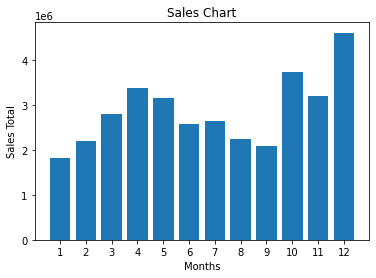

In [85]:
months = range(1,13)
result = df_12.groupby('Month').sum()

plt.bar(months, result['Total'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales Total')
plt.title('Sales Chart')

## 3. What US City had the highest Sales`

In [106]:
# after adding city from section 1

df_12.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'City', 'Total'],
      dtype='object')

In [107]:
result = df_12.groupby('City').sum()
result

,Quantity Ordered,Price Each,Month,Total
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


<BarContainer object of 10 artists>

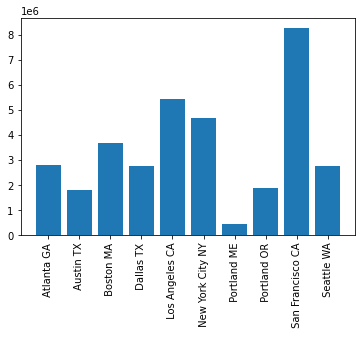

In [119]:
# cities = df_12['City'].unique() -> will mess with the order
cities = [city for city,df in df_12.groupby('City')]
plt.xticks(range(0,10), rotation = 'vertical')
plt.bar(cities, result['Total'])

## 4. What time should we display ads for max sales?

In [120]:
df_12.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,Portland ME,11.95
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,San Francisco CA,1700.00


In [121]:
# best practice would be to convert the order date to time

df_12['Order Date'] = pd.to_datetime(df_12['Order Date'])

In [122]:
df_12.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,Portland ME,11.95
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,San Francisco CA,1700.00


In [123]:
# now let's separate and see the hours and min

hours = df_12['Order Date'].dt.hour
mins = df_12['Order Date'].dt.minute

df_12.insert(loc = 5, column = 'hour', value = hours)
df_12.insert(loc = 6, column = 'minutes', value = mins)

df_12.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,hour,minutes,Purchase Address,Month,City,Total
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,19,34,"950 Walnut St, Portland, ME 04101",6,Portland ME,11.95
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,10,5,"80 4th St, San Francisco, CA 94016",6,San Francisco CA,1700.00


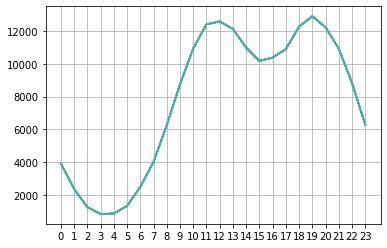

In [130]:
hours = [hour for hour,df in df_12.groupby('hour')]
minutes = [mins for mins,df in df_12.groupby('minutes')]
plt.xticks(hours, size = 10)
plt.grid()
plt.plot(hours, df_12.groupby(df_12['hour']).count())